## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr

## Import Datasets

In [2]:
#read in all csv files that are needed
customer = pd.read_csv('olist_customers_dataset.csv')
geo_location = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')


#read in orders dataframe using parse dates to create a datetime column
orders=pd.read_csv('olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 
                                                              'order_approved_at',
                                                              'order_delivered_carrier_date',
                                                              'order_delivered_customer_date',
                                                              'order_estimated_delivery_date'])

## Merge the Data into one Dataframe

In [3]:
#main dataframe according to the graph is order_items, first step to add seller information using the seller_id
master_df = pd.merge(order_items, sellers, on=['seller_id'])

#add information about the deliver of the orders using order_id
master_df = pd.merge(master_df, orders, on=['order_id'] )

#add payment information using order_id
master_df = pd.merge(master_df, payments, on=['order_id'] )

#add review information using order_id
master_df = pd.merge(master_df, reviews, on=['order_id'] )

#add information about customer using customer_id
master_df = pd.merge(master_df, customer, on=['customer_id'] )

#add information about products using product_id
master_df = pd.merge(master_df, products, on=['product_id'] )

In [4]:
master_df.shape

(118315, 39)

In [5]:
#list the names of the headers
master_df.columns.tolist()

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

### Drop Duplicates
Duplicates arrise, because of the column payment sequential - which shows if someone has split payment between different methods

In [6]:
#the definition of a duplicate is: same order_id, same product_id
master_df.drop_duplicates(subset=['order_id', 'product_id', 'order_item_id'], keep = 'last', inplace = True)

In [7]:
time_series = ['order_purchase_timestamp',
               'order_approved_at',
               'order_delivered_carrier_date',
               'order_delivered_customer_date',
               'order_estimated_delivery_date']

In [8]:
type(master_df['order_delivered_carrier_date'][100000])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


In [10]:
revenue_product_category = master_df.groupby(['order_purchase_timestamp']).price.sum()

In [11]:
revenue_month = master_df.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M')).sum()

In [12]:
revenue_month.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_purchase_timestamp', freq='M')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[]

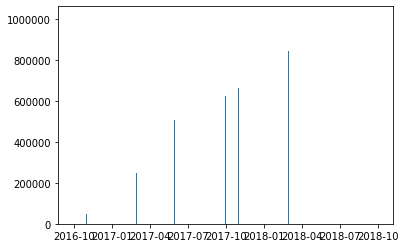

In [13]:
plt.bar(revenue_month.index, revenue_month['price'])
plt.plot()

## Heatmap
Covariance Matrix between price, installments, reviews, freight value

In [14]:
#define the columns that should be considered
columns_considered=['price', 'payment_value', 'freight_value',
                    'product_photos_qty', 'review_score', 'payment_installments']
#normalize the data, because the data ranges are very different
df_norm=(master_df[columns_considered]-master_df[columns_considered].mean())/master_df[columns_considered].std()

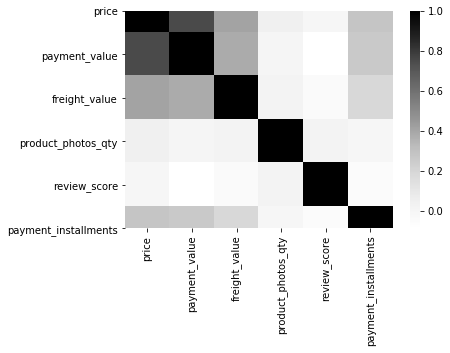

In [15]:
#plot the heatmap
sns.heatmap(df_norm.cov(), cmap='Greys')

## Products
this section will answer questions about the products

In [16]:
revenue_product_category = master_df.groupby(['product_category_name']).price.sum()

### Top 10 Product Categories by Revenue

In [17]:
revenue_sorted=revenue_product_category.sort_values(ascending=False)
type(revenue_sorted)

pandas.core.series.Series

[]

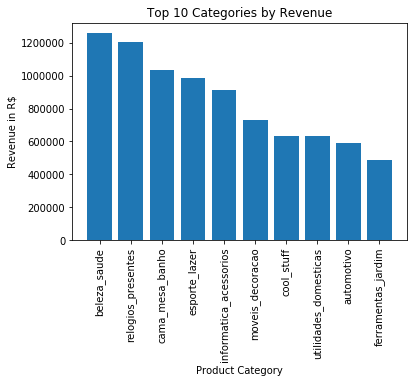

In [18]:
category_names=revenue_sorted.index[:10]
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Product Category')
plt.yticks()
plt.xticks(rotation=90)
plt.ylabel('Revenue in R$')
plt.bar(category_names, revenue_sorted[:10])
plt.plot()

### Top 10 Sold Products by Revenue

In [19]:
#calculate the revenue for each product
revenue_per_product = master_df.groupby(['product_id']).price.sum()

In [20]:
#number of unique product ids
master_df['product_id'].nunique()

32951

In [21]:
revenue_per_product = revenue_per_product.sort_values(ascending=False)

[]

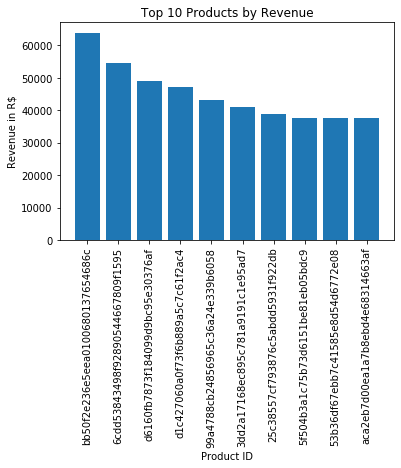

In [22]:
products=revenue_per_product.index[:10]
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.yticks()
plt.xticks(rotation=90)
plt.ylabel('Revenue in R$')
plt.bar(products, revenue_per_product[:10])
plt.plot()

In [23]:
#calculate the mean and median revenue for each product
product_revenue = master_df.groupby(['product_id']).price.sum()

In [24]:
product_revenue_mean = product_revenue.mean()
product_revenue_median = product_revenue.median()

#generate printout
print("The mean of seller's revenue is: " 
      + str(product_revenue_mean)
      + " the median is: "
      + str(product_revenue_median))

The mean of seller's revenue is: 412.476365815993 the median is: 136.68


### Correlation Between Sales and Rating

In [25]:
#calculate the revenue and the average review for the products
rating_product = master_df.groupby(['product_id']).review_score.mean()
product_revenue = master_df.groupby(['product_id']).price.sum()
average_price = master_df.groupby(['product_id']).price.mean()
units_sold = master_df.groupby(['product_id']).price.count()

In [26]:
#merge the two pandas series into a dataframes
column_headers = ['review_score', 'product_revenue', 'average_price', 'units_sold']
review_vs_price = pd.merge(rating_product, product_revenue, left_index = True, right_index = True)
review_vs_price = pd.merge(review_vs_price, average_price, left_index = True, right_index = True)
review_vs_price = pd.merge(review_vs_price, units_sold, left_index = True, right_index = True)
review_vs_price.columns = column_headers

In [27]:
review_vs_price.describe()

,review_score,product_revenue,average_price,units_sold
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,4.031617,412.476366,145.302692,3.418622
std,1.225592,1371.946464,246.895669,10.619716
min,1.000000,2.200000,0.850000,1.000000
25%,3.500000,59.900000,39.900000,1.000000
50%,4.500000,136.680000,79.000000,1.000000
75%,5.000000,329.000000,154.900000,3.000000
max,5.000000,63885.000000,6735.000000,527.000000


In [28]:
review_vs_price['review_score'].mean()

4.0316169629074325

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

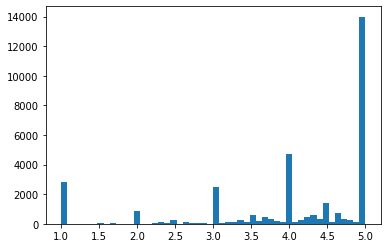

In [29]:
plt.hist(review_vs_price['review_score'], bins=50)
plt.plot

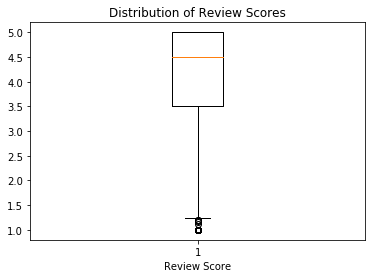

In [30]:
plt.boxplot(review_vs_price['review_score'])
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.show()

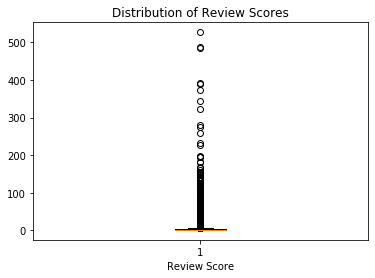

In [31]:
plt.boxplot(review_vs_price['units_sold'])
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.show()

the correlation coefficient between the review score and average price is: -0.0082778506162774 with a p-value of: 0.1329427017064835


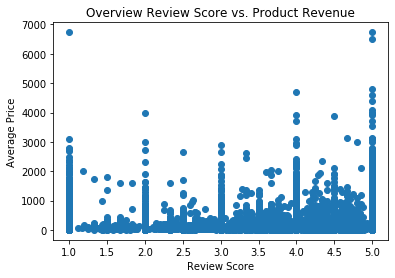

In [32]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(review_vs_price['review_score'], review_vs_price['average_price'])
print('the correlation coefficient between the review score and average price is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))
plt.scatter(review_vs_price['review_score'],review_vs_price['average_price'])
plt.xlabel('Review Score')
plt.ylabel('Average Price')
plt.title('Overview Review Score vs. Product Revenue')
plt.show()

the correlation coefficient between the review score and product revenue is: -0.006400416071093434 with a p-value of: 0.24531768500613657


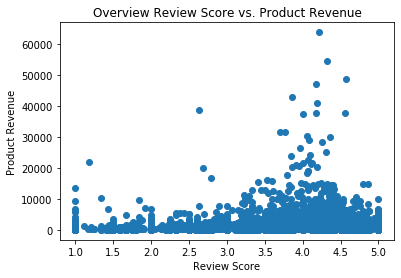

In [33]:
corr, p_value = pearsonr(review_vs_price['review_score'], review_vs_price['product_revenue'])
print('the correlation coefficient between the review score and product revenue is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))

plt.scatter(review_vs_price['review_score'],review_vs_price['product_revenue'])
plt.xlabel('Review Score')
plt.ylabel('Product Revenue')
plt.title('Overview Review Score vs. Product Revenue')
plt.show()

the correlation coefficient between the review score and units_sold is: -0.004163506968284898 with a p-value of: 0.44979821693836697


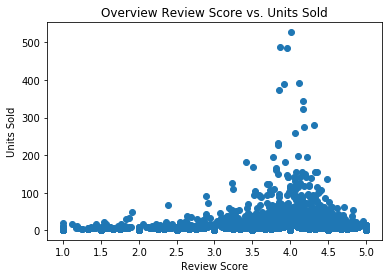

In [34]:
corr, p_value = pearsonr(review_vs_price['units_sold'], review_vs_price['review_score'])
print('the correlation coefficient between the review score and units_sold is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))
plt.scatter(review_vs_price['review_score'],review_vs_price['units_sold'])
plt.xlabel('Review Score')
plt.ylabel('Units Sold')
plt.title('Overview Review Score vs. Units Sold')
plt.show()

the correlation coefficient between the average_price and units_sold is: -0.032136663582430426 with a p-value of: 5.383423340623596e-09


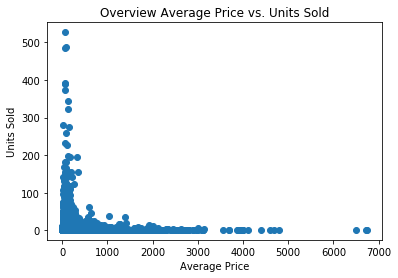

In [35]:
corr, p_value = pearsonr(review_vs_price['average_price'], review_vs_price['units_sold'])
print('the correlation coefficient between the average_price and units_sold is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))
plt.scatter(review_vs_price['average_price'],review_vs_price['units_sold'])
plt.xlabel('Average Price')
plt.ylabel('Units Sold')
plt.title('Overview Average Price vs. Units Sold')
plt.show()

### Number of Units Bought by Single Customer

(array([8.8863e+04, 0.0000e+00, 7.5160e+03, 0.0000e+00, 0.0000e+00,
        1.3210e+03, 0.0000e+00, 5.0500e+02, 0.0000e+00, 0.0000e+00,
        2.0400e+02, 0.0000e+00, 1.9800e+02, 0.0000e+00, 0.0000e+00,
        2.2000e+01, 0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ,
         5.4,  5.8,  6.2,  6.6,  7. ,  7.4,  7.8,  8.2,  8.6,  9. ,  9.4,
         9.8, 10.2, 10.6, 11. , 11.4, 11.8, 12.2, 12.6, 13. , 13.4, 13.8,
        14.2, 14.6, 15. , 15.4, 15.8, 16.2, 16.6, 17. , 17.4, 17.8, 18.2,
        18.6, 19. , 19

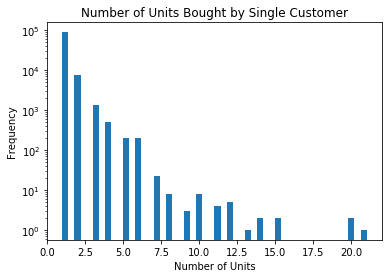

In [36]:
#count the number of units bought by a single customer
units_bought = master_df.groupby(['customer_id']).product_id.count()
units_bought.describe()
plt.yscale('log')
plt.title('Number of Units Bought by Single Customer')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.hist(units_bought, bins = 50)

### Higher Ratings with Multiple Purchases

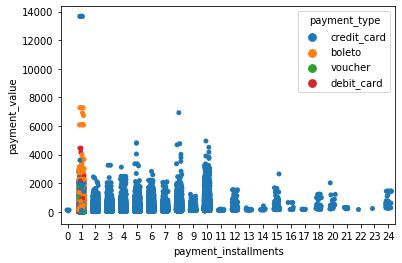

In [37]:
sns.stripplot(x='payment_installments', y='payment_value', data=master_df, jitter=0.2, hue='payment_type')

the correlation coefficient between the units_bought and average_review is: -0.0802191377798648 with a p-value of: 8.095917830915884e-146


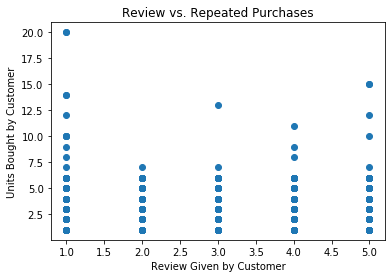

In [38]:
#calculate how many times a user bought a product
units_bought = master_df.groupby(['customer_id','product_id'])['product_id'].count()
#calculate how the average review a user gave to a product
average_review = master_df.groupby(['customer_id', 'product_id'])['review_score'].mean()


corr, p_value = pearsonr(units_bought, average_review)
print('the correlation coefficient between the units_bought and average_review is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))

plt.scatter(average_review, units_bought)
plt.xlabel('Review Given by Customer')
plt.ylabel('Units Bought by Customer')
plt.title('Review vs. Repeated Purchases')
plt.show()

### Monthly Sales Overviews 

In [39]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112647 entries, 0 to 118314
Data columns (total 39 columns):
order_id                         112647 non-null object
order_item_id                    112647 non-null int64
product_id                       112647 non-null object
seller_id                        112647 non-null object
shipping_limit_date              112647 non-null object
price                            112647 non-null float64
freight_value                    112647 non-null float64
seller_zip_code_prefix           112647 non-null int64
seller_city                      112647 non-null object
seller_state                     112647 non-null object
customer_id                      112647 non-null object
order_status                     112647 non-null object
order_purchase_timestamp         112647 non-null datetime64[ns]
order_approved_at                112632 non-null datetime64[ns]
order_delivered_carrier_date     111453 non-null datetime64[ns]
order_delivered_customer_

## Payments

In [40]:
master_df.shape

(112647, 39)

[]

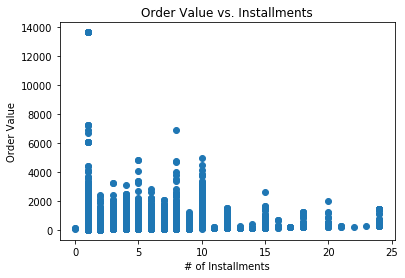

In [41]:
plt.title('Order Value vs. Installments')
plt.xlabel('# of Installments')
plt.ylabel('Order Value')
plt.scatter(master_df['payment_installments'], master_df['payment_value'])
plt.plot()

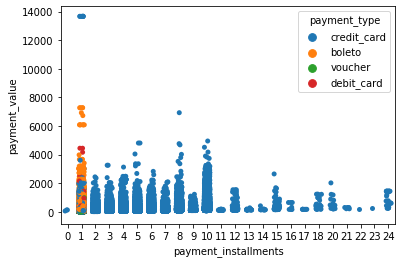

In [42]:
sns.stripplot(x='payment_installments', y='payment_value', data=master_df, jitter=0.2, hue='payment_type')

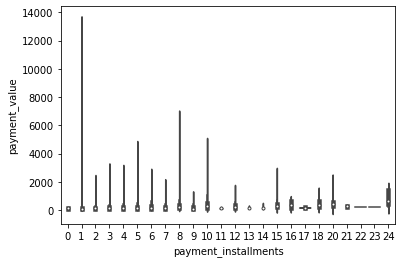

In [43]:
sns.violinplot(x='payment_installments', y='payment_value', data=master_df)

[]

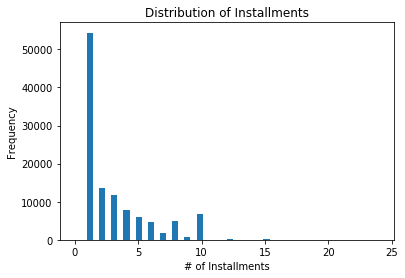

In [44]:
plt.hist(master_df['payment_installments'], bins=50)
plt.title('Distribution of Installments')
plt.xlabel('# of Installments')
plt.ylabel('Frequency')
plt.plot()

## Delivery

In [45]:
#calculation of average freight value and freight value as % of price
#calculate the order value and the total freight costs, because the costs were split between products of bigger orders
order_value = master_df.groupby('order_id').price.sum()
order_freight_value = master_df.groupby('order_id').freight_value.sum()

order_freight_value.describe()

count    98665.000000
mean        22.823707
std         21.650971
min          0.000000
25%         13.850000
50%         17.170000
75%         24.040000
max       1794.960000
Name: freight_value, dtype: float64

In [46]:
#merge the pandas series into a pandas dataframe
order_information = pd.merge(order_value, order_freight_value, left_index = True, right_index = True)

In [47]:
#calculate the freight value as % of the price
order_information['pct_FV_to_price'] = order_information['freight_value']/order_information['price']

In [48]:
order_information.describe()

,price,freight_value,pct_FV_to_price
count,98665.000000,98665.000000,98665.000000
mean,137.754105,22.823707,0.308391
std,210.646213,21.650971,0.314763
min,0.850000,0.000000,0.000000
25%,45.900000,13.850000,0.131864
50%,86.900000,17.170000,0.224374
75%,149.900000,24.040000,0.380196
max,13440.000000,1794.960000,21.447059


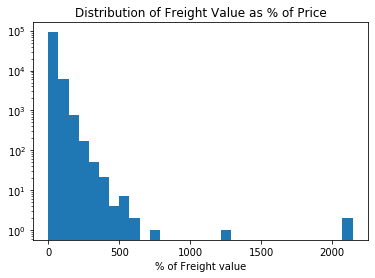

In [49]:
#the pct_FV_to_price needs to be multiplied by 100 to get %
plt.hist(order_information['pct_FV_to_price']*100, bins = 30)
plt.yscale('log')
plt.title('Distribution of Freight Value as % of Price')
plt.xlabel('% of Freight value')
plt.show()

In [50]:
master_df['delivery_time'].describe()

KeyError: 'delivery_time'

## Seller

This section will answer questions about the seller of the marketplace

In [51]:
#calculate the revenue of the different sellers in the dataset
seller_revenue = order_items.groupby(['seller_id']).price.sum()
mean_purchase_seller = order_items.groupby(['seller_id']).price.mean()

In [52]:
#number of sellers on the marketplace
seller_revenue.count()

3095

In [53]:
#the seller with the largest revenue
seller_revenue.max()

229472.6299999981

[]

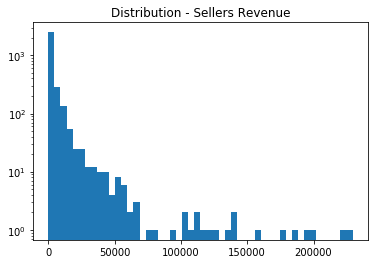

In [54]:
plt.hist(seller_revenue, bins=50)
plt.yscale('log') 
plt.title('Distribution - Sellers Revenue')
plt.plot()

[]

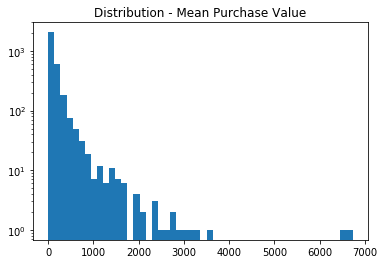

In [55]:
plt.hist(mean_purchase_seller, bins=50)
plt.yscale('log') 
plt.title('Distribution - Mean Purchase Value')
plt.plot()

In [56]:
seller_revenue_mean = seller_revenue.mean()
seller_revenue_median = seller_revenue.median()

#generate printout
print("The mean of seller's revenue is: " 
      + str(seller_revenue_mean)
      + " the median is: "
      + str(seller_revenue_median))

The mean of seller's revenue is: 4391.484232633301 the median is: 821.48


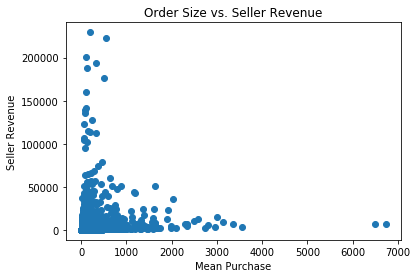

In [57]:
plt.scatter(mean_purchase_seller, seller_revenue)
plt.title('Order Size vs. Seller Revenue')
plt.ylabel('Seller Revenue')
plt.xlabel('Mean Purchase')
plt.show()

### Seller City and State

In [58]:
seller_revenue.head()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     2685.00
001cca7ae9ae17fb1caed9dfb1094831    25080.03
001e6ad469a905060d959994f1b41e4f      250.00
002100f778ceb8431b7a1020ff7ab48f     1234.50
003554e2dce176b5555353e4f3555ac8      120.00
Name: price, dtype: float64

In [59]:
from collections import defaultdict
#get only one entry per seller
# sorting seller ID first
master_df.sort_values('seller_state', inplace = True) 
  
# dropping ALL duplicte values 
sellers = master_df.drop_duplicates(subset ='seller_id') 

#count the states with a dictionary
states = defaultdict(int)

#loop over the sellers and store the different states
for state in sellers['seller_state']:
    states[state]+=1

#count the different cities with a dictionary
cities = defaultdict(int)
#loop over the sellers and store the different cities
for city in sellers['seller_city']:
    cities[city]+=1

[]

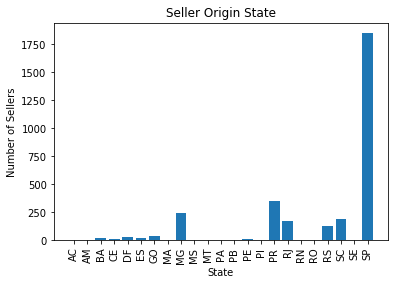

In [60]:
plt.title('Seller Origin State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.yticks()
plt.xticks(rotation=90)
plt.bar(states.keys(), states.values())
plt.plot()

## Do Sellers Sell Locally?

In [61]:
states = master_df[['seller_state','customer_state']]
states.head()

,seller_state,customer_state
118190,AC,SP
117202,AM,MA
117203,AM,MG
117204,AM,AL
59611,BA,RJ


In [62]:
states = master_df[['seller_state','customer_state']]
states_new = states.groupby(['seller_state', 'customer_state']).size().reset_index()
states_new.columns = ['seller_state','customer_state', 'number_of_sales']
states_new.shape

(417, 3)

In [89]:
#sort the values in descending order to get the states with the biggest sales
states_new = states_new.sort_values(by=['number_of_sales'], ascending = False)
#cut off the top 25 combination of states to display in the Sankey Diagram
states_new = states_new.iloc[:25,:]
states_new.shape

(25, 3)

In [90]:
#create a list with unique values for each state to use it as index labels
customer_states = states_new['customer_state'].unique()
seller_states = states_new['seller_state'].unique()
states = np.unique(np.concatenate((customer_states, seller_states),0))
states_list = states.tolist()

In [91]:
#create a list from each dataframe column
seller_states = states_new['seller_state'].to_list()
customer_states = states_new['customer_state'].to_list()
number_of_sales = states_new['number_of_sales'].to_list()

In [92]:
#replace the state with the respective number of the index of the list states_list
for num, states in enumerate(customer_states):
    customer_states[num] = states_list.index(states)

for num, states in enumerate(seller_states):
    seller_states[num] = states_list.index(states)

In [93]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = states_list,
      color = "blue"
    ),
    link = dict(
      source = seller_states, # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = customer_states,
      value = number_of_sales
  ))])

fig.update_layout(title_text="Sankey Diagram Sales Flow", font_size=10)
fig.show()

## Clients

In [94]:
client_spending = master_df.groupby(['customer_id']).price.sum()
clients=client_spending.sort_values(ascending=False)

#print revenue of top 20 clients
clients[:20]

customer_id
1617b1357756262bfa56ab541c47bc16    13440.00
ec5b2ba62e574342386871631fafd3fc     7160.00
c6e2731c5b391845f6800c97401a43a9     6735.00
f48d464a0baaea338cb25f816991ab1f     6729.00
3fd6777bbce08a352fddd04e4a7cc8f6     6499.00
05455dfa7cd02f13d132aa7a6a9729c6     5934.60
df55c14d1476a9a3467f131269c2477f     4799.00
24bbf5fd2f2e1b359ee7de94defc4a15     4690.00
e0a2412720e9ea4f26c1ac985f6a7358     4599.90
3d979689f636322c62418b6346b1c6d2     4590.00
cc803a2c412833101651d3f90ca7de24     4400.00
1afc82cd60e303ef09b4ef9837c9505c     4399.87
35a413c7ca3c69756cb75867d6311c0d     4099.99
e9b0d0eb3015ef1c9ce6cf5b9dcbee9f     4059.00
c6695e3b1e48680db36b487419fb0398     3999.90
926b6a6fb8b6081e00b335edaf578d35     3999.00
3be2c536886b2ea4668eced3a80dd0bb     3980.00
31e83c01fce824d0ff786fcd48dad009     3930.00
eb7a157e8da9c488cd4ddc48711f1097     3899.00
19b32919fa1198aefc0773ee2e46e693     3700.00
Name: price, dtype: float64

[]

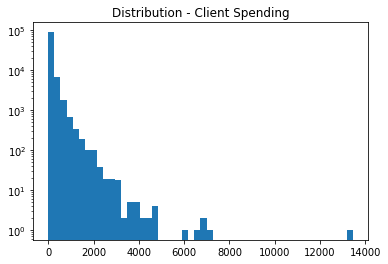

In [95]:
plt.hist(client_spending, bins=50)
plt.yscale('log') 
plt.title('Distribution - Client Spending')
plt.plot()

# Recomendation System 

In [69]:
import pandas as pd
import numpy as np
import time

In [70]:
#create a dataframe with the customer IDs, the order IDs, and the product IDs
df_recommender = pd.merge(orders, customer, on=['customer_id'])
df_recommender = pd.merge(df_recommender, order_items, on=['order_id'])

#define the variables needed: - leave order_id out for now
variables = ['customer_id', 'product_id']
df_recommender = df_recommender[variables]
df_recommender.head()

,customer_id,product_id
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a
1,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8
2,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415
3,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0
4,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e


In [71]:
#calculate the number of products bought by a customer
df_recommender_sorted = pd.DataFrame(df_recommender.groupby(['customer_id'])['product_id'].value_counts())
df_recommender_sorted.head(5)

,,product_id
customer_id,product_id,
00012a2ce6f8dcda20d059ce98491703,64315bd8c0c47303179dd2e25b579d00,1
000161a058600d5901f007fab4c27140,84183944dc7cddca87a5d384452c1d3c,1
0001fd6190edaaf884bcaf3d49edf079,9df2b21ec85378d71df4404712e17478,1
0002414f95344307404f0ace7a26f1d5,af3ec22cce878225aae6d9eb6c7a78eb,1
000379cdec625522490c315e70c7a9fb,868b3136c5b206f91b8208fbfdf2cb7c,1


In [72]:
#count the number of products bought by a customer
number_purchases = pd.DataFrame(master_df['customer_id'].value_counts())

#filter the customer that bough more than once, a recommender only works if a customer has bought several times
customers_several_purchases = number_purchases[number_purchases['customer_id'] > 1].reset_index()

#reassign the value of the columns
customers_several_purchases.columns = ['customer_id', 'count']
customers_several_purchases

,customer_id,count
0,fc3d1daec319d62d49bfb5e1f83123e9,21
1,be1b70680b9f9694d8c70f41fa3dc92b,20
2,bd5d39761aa56689a265d95d8d32b8be,20
3,10de381f8a8d23fff822753305f71cae,15
4,adb32467ecc74b53576d9d13a5a55891,15
...,...,...
9797,b1f6aad7ea584473474457e280189ce4,2
9798,749d30cbf1b9bd281f3a8be978f6b8a8,2
9799,be82df97dfd71eba6ea5ffd99caed7ea,2
9800,477ba7008fa296dafcedb37b8bd9b702,2


## Matrix
Create a patrix customer_id as a row and product_id as a column 

In [176]:
import turicreate as tc
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [73]:
#merge the customers and the products they bought
recommender = pd.merge(customers_several_purchases, df_recommender, on=['customer_id'])
recommender = recommender.groupby(['customer_id'])['product_id'].value_counts()
recommender = recommender.unstack()
recommender.head()

product_id,0011c512eb256aa0dbbb544d8dffcf6e,001795ec6f1b187d37335e1c4704762e,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002af88741ba70c7b5cf4e4a0ad7ef85,003a31970fea14fffe92ac856b8a9b97,003c0b8f6580c850bd2e32044d2ac307,0042f1a9a7e0edd1400c6cd0fda065f8,004636c889c7c3dad6631f136b7fa082,...,ffbc83054b3741a8d67fc59d9cf9d42d,ffbe169d395060d7fb975c990581a329,ffc9caf33e2d1e9f44e3e06da19085f7,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffe8083298f95571b4a66bfbc1c05524,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc
customer_id,,,,,,,,,,,,,,,,,,,,,
00066ccbe787a588c52bd5ff404590e3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000bf8121c3412d3057d32371c5d3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001450ebb4a77efb3d68be5f7887cb1e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002f90a6eb386bc43bc9ba200db31a89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0031abfb953b66e998f67b09e7b11375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalize Values in the Data Frame for the recommender

In [74]:
recommender_norm = (recommender-recommender.min())/(recommender.max()-recommender.min())
recommender_norm

product_id,0011c512eb256aa0dbbb544d8dffcf6e,001795ec6f1b187d37335e1c4704762e,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002af88741ba70c7b5cf4e4a0ad7ef85,003a31970fea14fffe92ac856b8a9b97,003c0b8f6580c850bd2e32044d2ac307,0042f1a9a7e0edd1400c6cd0fda065f8,004636c889c7c3dad6631f136b7fa082,...,ffbc83054b3741a8d67fc59d9cf9d42d,ffbe169d395060d7fb975c990581a329,ffc9caf33e2d1e9f44e3e06da19085f7,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffe8083298f95571b4a66bfbc1c05524,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc
customer_id,,,,,,,,,,,,,,,,,,,,,
00066ccbe787a588c52bd5ff404590e3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000bf8121c3412d3057d32371c5d3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001450ebb4a77efb3d68be5f7887cb1e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002f90a6eb386bc43bc9ba200db31a89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0031abfb953b66e998f67b09e7b11375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe7ffb7c7ae0d42808f387578426b3b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffed5d4f6245fe13cd57054621eec36a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff168ca1f8a1d2e8e2108b231a68a8c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# create a table for input to the modeling  
d = recommender_norm.reset_index() 
d.index.names = ['scaled_purchase_freq'] 
data_norm = pd.melt(d, id_vars=['customer_id'], value_name='scaled_purchase_freq').dropna()
print(data_norm.shape)
data_norm.head()

(5140, 3)


,customer_id,product_id,scaled_purchase_freq
24298,7a3a3328b35a65930d54ebbb1b491501,001b72dfd63e9833e8c02742adf472e3,1.0
24475,7eab641be5b633438b8082aad878cb4a,001b72dfd63e9833e8c02742adf472e3,0.0
29057,f6cc73c737c6c32ef0aba0d6d7aa84a4,001b72dfd63e9833e8c02742adf472e3,1.0
128077,115b6f4638633b24cc0224855cac1198,008cff0e5792219fae03e570f980b330,1.0
133908,a8e96c63b740c4669200ca0aa38d2180,008cff0e5792219fae03e570f980b330,0.0


In [76]:
def split_data(data):
    '''
    Splits dataset into training and test set.
    
    Args:
        data (pandas.DataFrame)
        
    Returns
        train_data (tc.SFrame)
        test_data (tc.SFrame)
    '''
    train, test = train_test_split(data, test_size = .2)
    train_data = tc.SFrame(train)
    test_data = tc.SFrame(test)
    return train_data, test_data

In [173]:
train_data, test_data = split_data(data_norm)

NameError: name 'train_test_split' is not defined

In [179]:
def model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display):
    if name == 'popularity':
        model = tc.popularity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target)
    elif name == 'cosine':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='cosine')
    elif name == 'pearson':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='pearson')
        
    recom = model.recommend(users=users_to_recommend, k=n_rec)
    recom.print_rows(n_display)
    return model

In [180]:
name = 'cosine'
target = 'scaled_purchase_freq'
user_id = 'customer_id'
item_id = 'product_id'
train_data = data_norm
users_to_recommend = list(data_norm[user_id])
n_rec = 10 # number of items to recommend
n_display = 30 # to display the first few rows in an output dataset

cos = model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

TypeError: observation_data input must be a SFrame

In [163]:
recommender_matrix = recommender.values

In [164]:
recommender_matrix[:10]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [165]:
from scipy.sparse import csr_matrix
#create sparse matrix
sparse_recommender_matrix = csr_matrix(recommender_matrix)
sparse_recommender_matrix

<9802x8156 sparse matrix of type '<class 'numpy.float64'>'
	with 79945112 stored elements in Compressed Sparse Row format>